## AI란 ?

- 사람의 지능을 컴퓨터 시스템으로 구현하는 것
- 지능 : 인지능력, 지각능력, 기억, 이해, 사고능력
- reference : 사람

## computer_vision이란?

- Computer Grapics(Rendering) : 정보를 이용해서 이미지를 구현
- Computer Vision(Inverse rendering) : 이미지를 이용해서 정보를 뽑아냄

- 구현방법
    - Machine Learning : input -> feature extraction(특성추출법 설계) -> classification(분류) -> output
    - Deep Learning : input -> feature extraction(특성추출) + classification -> output 

## classification

- k-NN
    - 질의데이터를 주변의 라벨데이터와 비교해 근사값으로 분류
    - 데이터가 많을수록 라벨정의에 유리함
    - 데이터가 많을수록 검색시간이 증가, 시스템 복잡도가 올라감 
    - 사용하기 위해선 영상간의 유사도를 먼저 정의해줘야함 

- Convolutional Neural Networks 
   - fully connected neural net : 모든 픽셀에 서로다른 가중치를 내적 -> 액티베이션 펑션 -> 분류 (간단한 모델)
       - 가중치를 reshape해 이미지화 하면 각 class 마다의 평균영상처럼 보임
       - 평균적인 패턴과 다른 모습(cropped등)을 보이면 잘못된 분류를 함
       
   - locally connected neural net : 국부적인 영역에 대해서만 고려, 국부적인 영역을 전 영역으로 순회하며 특성을 뽑아냄
        - 더 적은 파라메터로 효과적인 특성을 추출 가능
        - 오버피팅이 방지됨
        - cnn의 방식
    

### cnn 발전사 

1) AlexNet
    - 1998년 yann LeCun에 의해 제안
    - LeNet에서 많은 영감을 받아 유사한 부분이 많음, LeNet보다 훨씬 깊음
    - 1글자 단위의 인식
    - gpu의 용량문제 때문에 2개의 패스로 나눠사용했었음
    - gpu의 발전으로 단일패스로 변경
        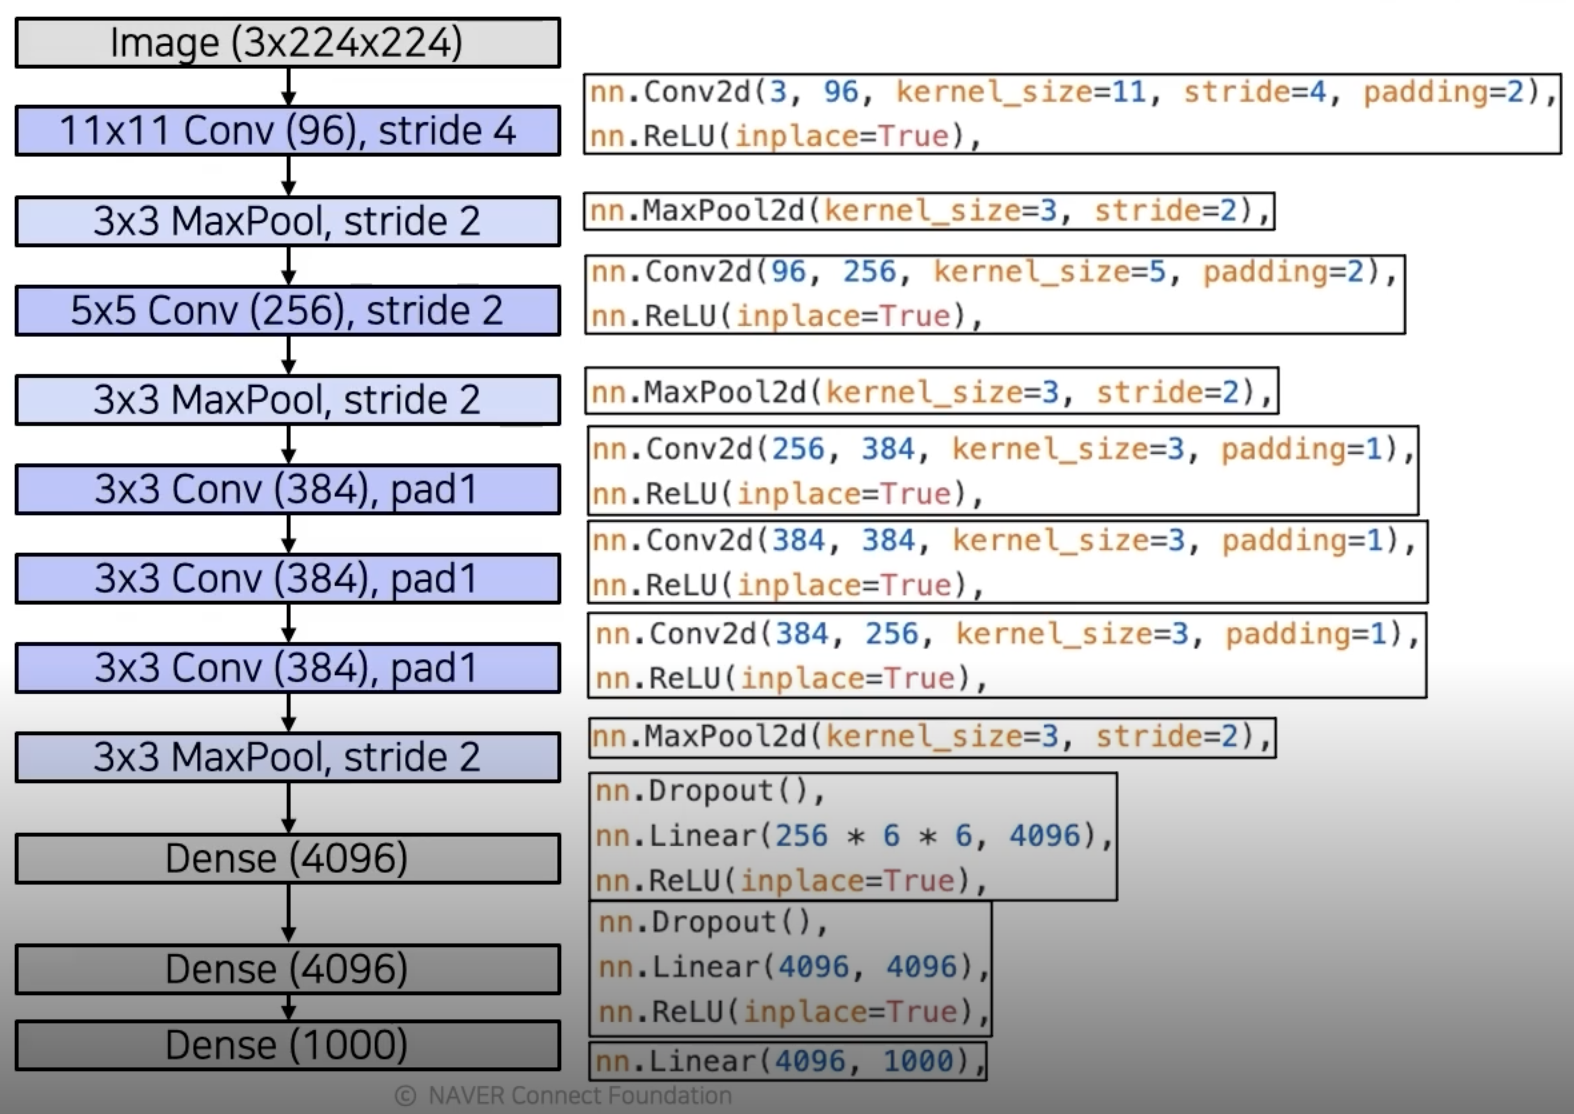
    - maxpooling 에서 Linear로(3D->2D or 1D) 가기위해선 flatten이 필요

2. VGGNet
    - 깊은 레이어 (16 or 19)
    - 3x3의 conv와 2x2의 pooling 만 사용
    - 높은 성능과 일반화
    - AlexNet과 동일한 input size
        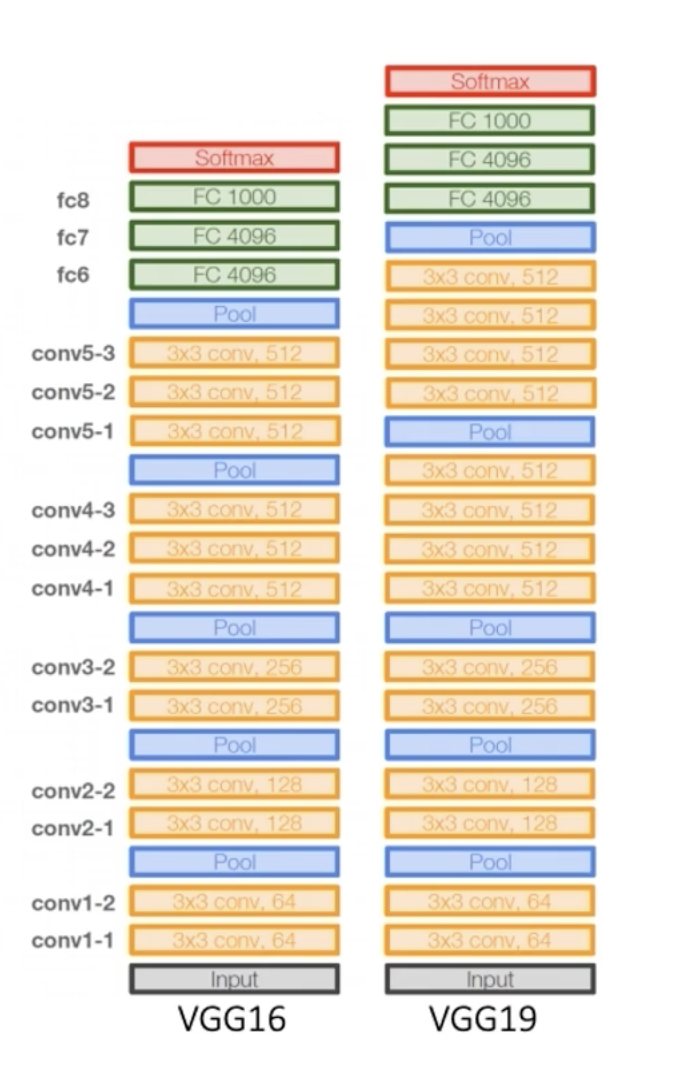

```
네트워크가 깊을수록 receptive field가 커지고, 더욱 복잡한 관계에 대해 학습이 가능하다는 강력한 특징들을 가짐

단순히 네트워크를 깊게 쌓게된다면 최적화하기 어렵다는 문제가 발생
    - 깊은 네트워크에서 역전파 알고리즘을 수행할 경우, Gradient 값이 너무 커지거나, 소실에 가까울 정도로 너무 작아지는 현상이 발생해서
    - 계산복잡도가 증가해서

```

3. GoogLeNet
    - Inception module이라는 새로운 구조를 제안
    - 하나의 층에서 다양한 사이즈의 필터를 활용 + 각 필터를 거친 출력 값을 channel 축으로 concat해줌으로써, 다양한 측면의 특징을 추출하겠다는 시도
    - 당연히 파라미터의 수가 증가하고, 그에 따라 증가한 계산량이 증가하는 단점
    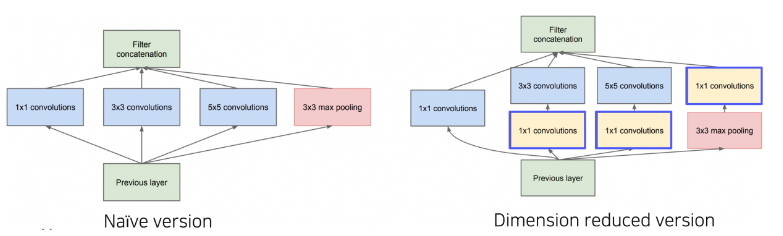

```
## 1X1 Convolution
=> 필터의 개수에 따라 출력의 channel dimension이 결정되기 때문에 입력에 비해 channel dimension을 줄이고 결과적으로 계산량을 줄임

```
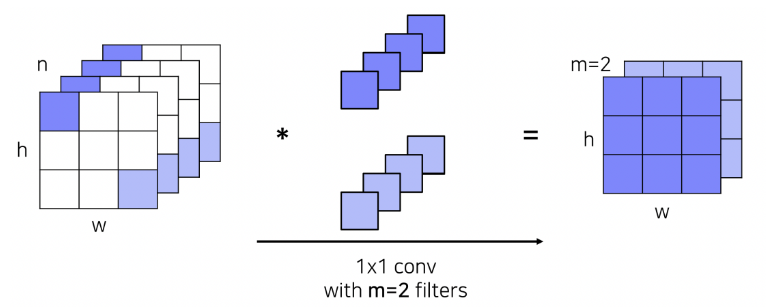

GoogLeNet의 전체 구조


- vanilla convolution network로 구성
- Inception module을 중첩해서 쌓는 형태
- 중간중간에 auxiliary classifier가 추가적으로 구성
    - gradient vanishing 문제를 완화하기 위해 추가, 레이어의 중간중간에 추가적인 gradient를 주입시키는 방식
    
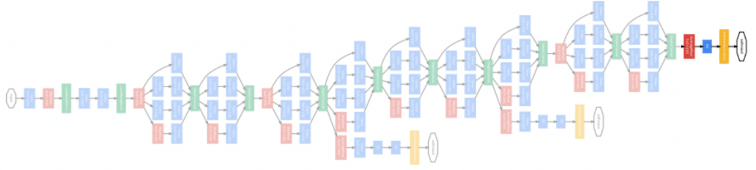

3. ResNet
    - 100개 이상의 깊은 층을 갖는 구조
    - 더 깊은 층을 쌓을수록 성능이 좋아진다는 것을 보여준 첫 논문

(1) 깊은 층이 가능한 이유
- 좌측과 같이 일반적인 구조로 H(x)라는 특정 mapping을 학습할 때 층을 깊게 쌓아, x로 부터 곧바로 H(x)를 학습하려고 한다면 복잡하기 때문에 학습하기 어려움
- 우측과 같이 입력에서 주어진 identity x를 제외한 나머지 부분, F(x)만 모델링하여 학습시킨다면 학습의 부담을 경감하여 그 난이도를 낮출 수 있음

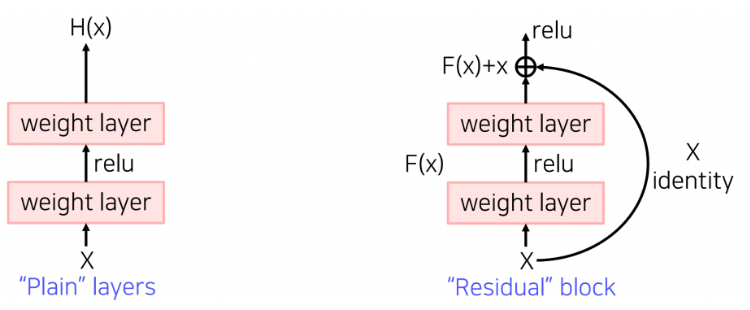

- 이를 위해선 shortcut connection이 필요
- 이 때 중요한 점은 shortcut connection에도 gradient가 흐를 수 있도록 설계하여, gradient vanishing 문제를 해결할 수 있었다는 점
- Residual block의 수를 n이라고 할 때, gradient는 2^n개의 다른 경로로 흐를 수 있게 되는데, 이렇게 다양한 경로를 통해서 굉장히 복잡한 매핑을 학습해 좋은 성능을 달성

4. Beyond ResNets


4-1 DenseNet
- 기존의 모델들은 잔여정보만을 통해 identity mapping을 구현했지만 Dense block에서는 채널 축을 중심으로 concatenation을 수행
- 바로 직전의 입력만 연결하는 것이 아니라 그 이전의 입력들도 모두 연결하도록 debse하게 설계
- 이때 값을 합하는게 아니라 concatenation하기 때문에 계산이 복잡해짐

4-2 SENet
- depth를 높히거나 connection을 추가하는게 아니라 주어진 activation 간의 관계가 명확해질 수 있도록 채널간의 관계를 모델링하고 중요도를 파악해 중요한 특징에 집중함(attention을 생성)

4-3 EfficientNet
-  width scaling(너비조절), depth scaling(깊이조절), resolution scaling(입력데이터크기 조절)의 세가지 방식을 적절하게 활용해 좋은 성능을 달성
- => compound scaling
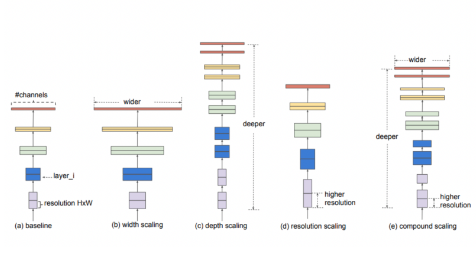

4-4 Deformable Convolution
- 불규칙적인 convolution을 수행
- 사람, 동물처럼 변형 가능한 부분을 잘 고려해 convolution을 수행하고자 제안
- 기본적인 convolution 연산을 수행하는 부분과 별도로 2D offset map을 추정하기 위한 부분이 있음
    - 1. 이미지에 대해 2D offset map을 추정
    - 2. 기본적인 convolution 연산을 수행할 때 input feature map에서 참고하는 가중치들을 2D offset map 값에 따라 벌려줌
    - 3. receptive field가 변형가능한 shape을 따라 결정
    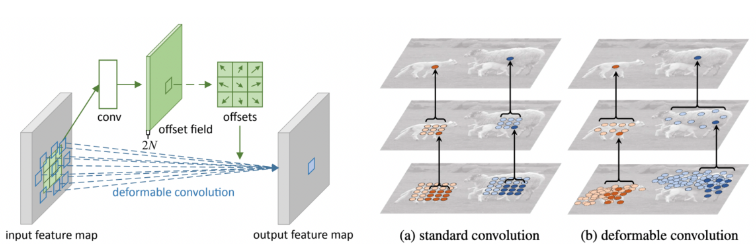

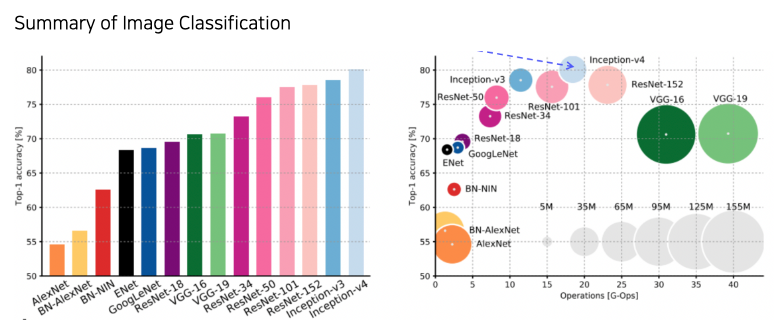